---
# Série de Fourier Suite : les calculs de coéfficients
---


## Faire le point
---

Maintenant que l'on sait analyser une série donnée et trouver ses propriétés :
- période
- valeur moyenne / composante continue
- parité (avec ou sans composante continue)
- fréquence des composante et somme partielle
- étirement en amplitude de la fonction (coefs proportionnels à l'amplitude)
- étirement dans le temps de la fonction (période dépendante de $T_0$ mais pas les coefs )

Il faut savoir calculer les coefficients d'une série connaissant uniquement la fonction périodique $f$, comme démarré dans l'exercice 2. 

Pour cela gardez la vision d'espace vectoriel (voir [cette partie du récap. sur série](intro_series.ipynb#Calcul-des-coefficients-de-Fourier)) et rappelez que 

> Pour trouver le coefficient $c(n)$ de $\vec{g}$ devant une composante $\vec{W_n}$
>
>  $g(t) = a_0 + \ldots + c(n) \underbrace{e^{i\,2\pi n t}}_{w_n(t)} + \ldots $
>
> il suffit de faire une projection du signal sur la composante avec le produit scalaire :
> 
> $c(n) = \left|\text{proj}_{/W_n}\left(\vec{g}\right)\right| \overset{\text{base ortho.}}{=} \frac{< e^{i2\pi n \bullet}, g>_p}{\|e^{i2\pi n \bullet}\|^2} \overset{\text{base normée}}{=} < e^{i2\pi n \bullet}, g>_p \overset{\text{g périodique}}{=} \frac{1}{T_0}\int_{0}^{T_0}g(t).\overline{e^{i2\pi n t}}\;dt$

La formule de recomposition est évidente : 

> $\vec{g}=\ldots \underbrace{<\vec{w_{-1}}, \vec{g}>}_{c(-1)}.\vec{w_{-1}}+ \underbrace{<\vec{w_{0}}, \vec{g}>}_{c(0)}.\vec{w_{0}}+ \underbrace{<\vec{w_{1}}, \vec{g}>}_{c(1)}.\vec{w_{1}}+\ldots$
> $\vec{g}=\sum_{n=-\infty}^{+\infty}\underbrace{<\vec{w_{n}}, \vec{g}>}_{c(n))}.\vec{w_{n}}$

**Attention** la base de vecteur $\left( \vec{W_n}\right)_{n\in\mathbb{Z}}$ est infinie certes, mais il suffit de calculer **une seule intégrale de produit scalaire pour un $n\in\mathbb{Z}$ quelconque** pour obtenir la formule des coefficients $c(n)$ qui est en fait **une suite numérique**

Cette vision est expliquée dans le récapitulatif sur les séries [ici pour les c(n)](intro_series.ipynb#Coefs-de-Fourier-avec-une-base-imaginaire-norm%C3%A9e-:-c(n)) et [là pour les a(n), b(n)](intro_series.ipynb#Coefs-de-Fourier-avec-une-base-r%C3%A9elle-:-a(n)-et-b(n)) (attention au facteur $2$ dans la formule car base non normée)

## Faire le lien avec Laplace (exo 2)
---
L'esprit est similaire et les formules aussi **mais** les espaces sont très différents. Toutefois, on peut transporter des transformées connues et les principaux théorèmes de Laplace vers Fourier et inversement car :


$\frac{1}{T_0}\mathrm{L}\left[f.\Pi_{[0 ; T_0]}\right](p=i n \omega_0) \quad = \quad \text{SdF}\left[f\right](n)$

> on fait le Laplace du signal $f$ sur une période (nul ailleurs), on divise par $T_0$ et on remplace $p$ par $i n \omega_0$

On récupère ainsi **toutes les formules de transformées de Laplace connues en séries de Fourier connues** et évite des calculs.

### Dans l'exo 2


On a vu [exo 1.g](#ch3_s4_laplace.ipynb#%C3%80-faire) la transformée de Laplace d'un lobe positif de sinus isolé (somme de deux sinus causaux, mais l'un avec un retard d'une demi-période). C'est le signal `f` de l'exercice 2 à des coefficients près. On peut donc retrouver $F(p)$ avec les propriétés de linéarité et du retard :

$F(p) = L[sin(\alpha\bullet)u(\bullet)](p) + L[sin(\alpha(\bullet-\tau)).u(\bullet-\tau)](p) = \underbrace{(1+e^{-\tau p})}_{\text{linéarité + th.. retard}} \underbrace{\frac{1}{|\alpha|}L[sin(\bullet).u(\bullet)](\frac{p}{\alpha})}_{\text{Th. changement échelle}} $

On a alors en prenant $\tau=T_0$ **sans se tromper sur la période $T_0$** de $|sin(\alpha\bullet)|$ qui est de fois plus courte que celle de $sin(\alpha\bullet)$ ! :

$c(n) = \frac{1}{T_0}F(p=e^{i n \omega_0})$

On doit trouver le même résultat, mais il faut savoir simplifier les expressions !


# Simplifactions
---

## La période doit disparaître !

Quand on intègre sin, cos ou $e^{i\,n\omega_0 t}$ sur une période $T_0$ alors on se retrouve dans la primitive à remplacer $t$ par des valeurs proportionnelles à $T_0$ (disons $a T_0$) ce qui donne des termes :

$ n\omega_0\,\underbrace{a.T_0}_{t} $ qui devient $n \frac{2\pi}{T_0}.a.T_0 = n.a.2\pi$

## Simplification trigonométrique complexes

Ces valeurs précédentes sont en arguments de sin ou cos ou exp, ce qui donne pour des valeurs de $a$ entières ou fractionnaires des valeurs remarquables à simplifier souvent selon la parité de $n$ :

a  | forme de $c(n)=A e^{i.n.a.2\pi} \dots$| simplifiée
---|---|---
1 ou entier $m$ | $c(n)=A. e^{i. n.m.2\pi}\ldots$ | $c(n) = A. 1 \ldots $
$\frac{1}{2}+m$ | $c(n)=A. e^{i. n.m.2\pi}.\underbrace{e^{i. n.\frac{2\pi}{2}}}_{\pm 1}\ldots$ | $c(n)=A.(-1)^n\ldots$
$\frac{1}{4}+m$ | $c(n)=A. e^{i. n.m.2\pi}.\underbrace{e^{i. n.\frac{2\pi}{4}}}_{\pm 1 \text{ou} \pm i}\ldots$ | $c(2n)=A.(-1)^n\ldots$   et   $c(2n+1)=A.i.(-1)^{n}\ldots$
$\frac{3}{4}+m$ | $c(n)=A. e^{i. n.m.2\pi}.\underbrace{e^{i. n.2\pi\frac{-1}{4}}}_{\pm 1 \text{ou} \pm i}\ldots$ | $c(2n)=A.(-1)^n\ldots$   et   $c(2n+1)=A.i.(-1)^{n+1}\ldots$
$\frac{p}{q}+m$ | $c(n)=A. e^{i. n.m.2\pi}.\underbrace{e^{i. n.2\pi\frac{p}{q}}}_{\text{racines de} x^k=1}\ldots$ | racines qièmes de l'unité 

Pour cela **bien dessiner le cercle unité, indiquer le point pour n=0 puis 1 etc. et repérer les valeurs identiques au signe près**

![racines](anim_racines_unite.gif)

Les coefficients sont alors définis par morceaux, par exemple pour $c(n)= \frac{A}{n} e^{i n \frac{2\pi}{3}}$ et $c(0)=v_m$ :

$c(n) = \left\{ \begin{array}{lll}  \frac{A}{n} & \text{ pour } n = 3p, & p\in\mathbb{Z}^* \\ \frac{A}{n}.\frac{-1+i\sqrt{3}}{2} &\text{ pour } n = 3p+1, & p\in\mathbb{Z} \\ \frac{A}{n}.\frac{-1-i\sqrt{3}}{2} &\text{ pour } n = 3p+2 , & p\in\mathbb{Z} \\ v_m &\text{ pour } n = 0 & \end{array}  \right.$

Si on décompose en $a(n)$ et $b(n)$ nous avons deux cas :

$a(0) = c(0) = v_m$

$a(n) = c(-n) + c(n) = 2\mathcal{R}\left(c(n)\right) = \left\{ \begin{array}{lll}  \frac{2A}{n} & \text{ pour } n = 3p, & p\in\mathbb{N}^* \\ \frac{-A}{n} & \text{ sinon } & \end{array} \right.$

$b(n) = c(-n) - c(n) = -2\mathcal{I}\left(c(n)\right) = \left\{ \begin{array}{lll}  \frac{-A\sqrt{3}}{n} & \text{ pour } n = 3p+1, & p\in\mathbb{N} \\ \frac{A\sqrt{3}}{n} & \text{ pour } n = 3p+2, & p\in\mathbb{N} \\ 0 & \text{ sinon } & \end{array} \right.$




ans =  1.7321


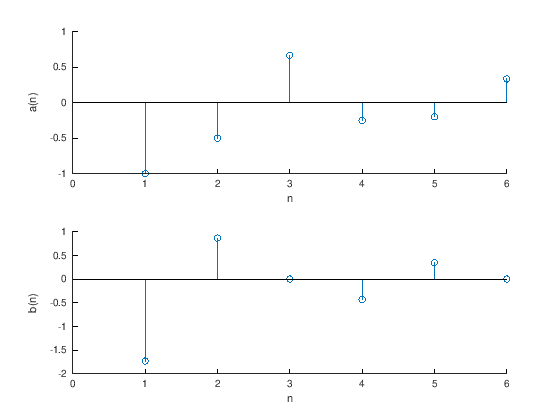

In [8]:
n = 0:6;
cn  = 1./n .* exp(i*n*2*pi/3);
an = 2*real(cn);
bn = -2*imag(cn);

subplot(211)
stem(n,an); 
xlabel('n');ylabel('a(n)')
subplot(212)
stem(n,bn); 
xlabel('n');ylabel('b(n)')
sqrt(3)